In [ ]:
# Data Acquisition and Exploration:
# Tasks: Identify and source the dataset(s), perform initial data exploration, and handle any missing or inconsistent data.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

<ipython-input-1-63628eb5c436>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Step 1:  Read in the `Bank_Personal_Loan_Modelling.csv` file and create a DataFrame.

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
from google.colab import files

In [3]:
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [4]:
data_path = "loan_approval_dataset.csv"
df = pd.read_csv(
    data_path,
    parse_dates=True,
    index_col='loan_id'
)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [5]:
orig_df = df.copy()
orig_df = orig_df.rename(columns={" no_of_dependents":"no_of_dependents", " education":"education", " self_employed":"self_employed", " income_annum":"income_annum", " loan_amount":"loan_amount", " loan_term":"loan_term"
, " cibil_score":"cibil_score", " residential_assets_value":"residential_assets_value", " commercial_assets_value":"commercial_assets_value", " luxury_assets_value":"luxury_assets_value", " bank_asset_value":"bank_asset_value"
, " loan_status":"loan_status"})
orig_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
print(df.head())

          no_of_dependents      education  self_employed   income_annum  \
loan_id                                                                   
1                        2       Graduate             No        9600000   
2                        0   Not Graduate            Yes        4100000   
3                        3       Graduate             No        9100000   
4                        3       Graduate             No        8200000   
5                        5   Not Graduate            Yes        9800000   

          loan_amount   loan_term   cibil_score   residential_assets_value  \
loan_id                                                                      
1            29900000          12           778                    2400000   
2            12200000           8           417                    2700000   
3            29700000          20           506                    7100000   
4            30700000           8           467                   18200000   
5     

In [7]:
# Exploring the Data
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
loan_approval_df = df.copy()
loan_approval_df = loan_approval_df.rename(columns={" no_of_dependents":"no_of_dependents", " education":"education", " self_employed":"self_employed", " income_annum":"income_annum", " loan_amount":"loan_amount", " loan_term":"loan_term"
, " cibil_score":"cibil_score", " residential_assets_value":"residential_assets_value", " commercial_assets_value":"commercial_assets_value", " luxury_assets_value":"luxury_assets_value", " bank_asset_value":"bank_asset_value"
, " loan_status":"loan_status"})
loan_approval_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
loan_approval_df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [10]:
# Check the columns and data types
print(loan_approval_df.info())

# Summary statistics of numerical columns
print(loan_approval_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB
None
       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
coun

In [11]:
# Check for missing values
print(loan_approval_df.isnull().sum())


no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [12]:
# Check for duplicates
print(loan_approval_df.duplicated().sum())


0


In [13]:
def status_change_int(loan_status):
    if (loan_status['loan_status'] == ' Approved'):
        return 1
    return 0
loan_approval_df['loan_status']=loan_approval_df.apply(status_change_int,axis=1)
loan_approval_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [14]:
def employ_change_int(loan_status):
    if (loan_status['self_employed'] ==' Yes'):
      return 1
    return 0
loan_approval_df['self_employed'] = loan_approval_df.apply(employ_change_int, axis = 1)
loan_approval_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,Not Graduate,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,Graduate,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,Graduate,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,Not Graduate,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [15]:
def graduate_change_int(loan_status):
    if (loan_status['education'] ==' Graduate'):
      return 1
    return 0
loan_approval_df['education'] = loan_approval_df.apply(graduate_change_int, axis = 1)
loan_approval_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [16]:
loan_approval_df['loan_status'] = loan_approval_df['loan_status'].astype(int)
loan_approval_df['education'] = loan_approval_df['education'].astype(int)
loan_approval_df['self_employed'] = loan_approval_df['self_employed'].astype(int)

In [17]:
print(loan_approval_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 433.6 KB
None


In [18]:
loan_approval_df['loan_status'].value_counts()

,count
loan_status,
1,2656
0,1613


In [19]:
y=loan_approval_df["loan_status"]
y

,loan_status
loan_id,
1,1
2,0
3,0
4,0
5,0
...,...
4265,0
4266,1
4267,0


In [20]:
print(loan_approval_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 433.6 KB
None


In [21]:
X = loan_approval_df.drop(columns=["loan_status"])

In [22]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled,y_train)


LogisticRegression(random_state=42)

In [26]:
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled,y_train)}")

Training Data Score: 0.921899406435489


In [27]:
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled,y_test)}")

Testing Data Score: 0.9054307116104869


In [28]:
predictions = logistic_regression_model.predict(X_test_scaled)



In [29]:
# Create a confusion matrix
print(confusion_matrix(y_test,predictions,labels=[1,0]))

[[631  47]
 [ 54 336]]


In [30]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
print(classification_report(y_test,predictions, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.92      0.93      0.93       678
           0       0.88      0.86      0.87       390

    accuracy                           0.91      1068
   macro avg       0.90      0.90      0.90      1068
weighted avg       0.91      0.91      0.91      1068



In [31]:
print(balanced_accuracy_score(y_test,predictions))

0.8961084638075789


In [32]:
print(balanced_accuracy_score(y_test,predictions))

0.8961084638075789


In [33]:
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
results_df

,Prediction,Actual
loan_id,,
1704,0,0
1174,1,1
309,0,0
1323,1,1
3272,1,1
...,...,...
3664,1,1
1510,1,1
605,1,1


k: 1, Train/Test Score: 1.000/0.872
k: 3, Train/Test Score: 0.952/0.884
k: 5, Train/Test Score: 0.939/0.885
k: 7, Train/Test Score: 0.930/0.888
k: 9, Train/Test Score: 0.929/0.898
k: 11, Train/Test Score: 0.930/0.900
k: 13, Train/Test Score: 0.932/0.897
k: 15, Train/Test Score: 0.930/0.897
k: 17, Train/Test Score: 0.930/0.893
k: 19, Train/Test Score: 0.927/0.902


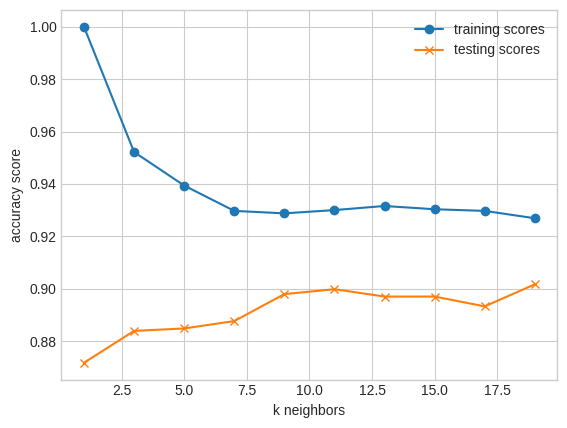

In [34]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [35]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [36]:
print(f"training: {rf_model.score(X_train,y_train)}")
print(f"testing: {rf_model.score(X_test,y_test)}")

training: 1.0
testing: 0.9812734082397003


In [37]:
svm_model = SVC(kernel="poly")
svm_model.fit(X_train_scaled,y_train)

print("training lr:", svm_model.score(X_train_scaled, y_train))
print("testing lr:", svm_model.score(X_test_scaled, y_test))

training lr: 0.9384567322711652
testing lr: 0.9138576779026217


In [38]:
dd = DecisionTreeClassifier()
dd.fit(X_train_scaled, y_train)
print("training lr:", dd.score(X_train_scaled, y_train))
print("testing lr:", dd.score(X_test_scaled, y_test))

training lr: 1.0
testing lr: 0.9822097378277154


In [39]:
print("training Linear Regression:", logistic_regression_model.score(X_train_scaled, y_train))
print("testing  Linear Regression:", logistic_regression_model.score(X_test_scaled, y_test))
print("================================================")
print("training RandomForest:", rf_model.score(X_train, y_train))
print("testing RandomForest:", rf_model.score(X_test, y_test))
print("================================================")
print("training SVM:", svm_model.score(X_train_scaled, y_train))
print("testing SVM:", svm_model.score(X_test_scaled, y_test))
print("================================================")
print("training DecisionTree:", dd.score(X_train_scaled, y_train))
print("testing DecisionTree:", dd.score(X_test_scaled, y_test))


training Linear Regression: 0.921899406435489
testing  Linear Regression: 0.9054307116104869
training RandomForest: 1.0
testing RandomForest: 0.9812734082397003
training SVM: 0.9384567322711652
testing SVM: 0.9138576779026217
training DecisionTree: 1.0
testing DecisionTree: 0.9822097378277154


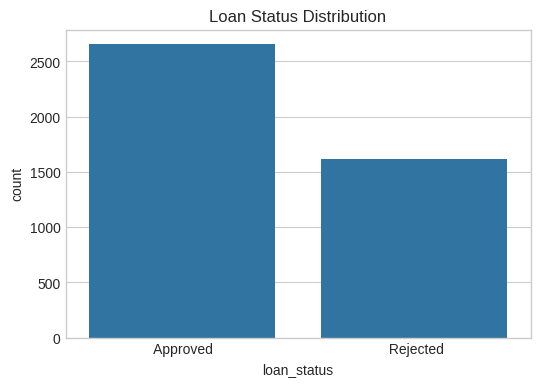

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=orig_df)
plt.title('Loan Status Distribution')
plt.show()

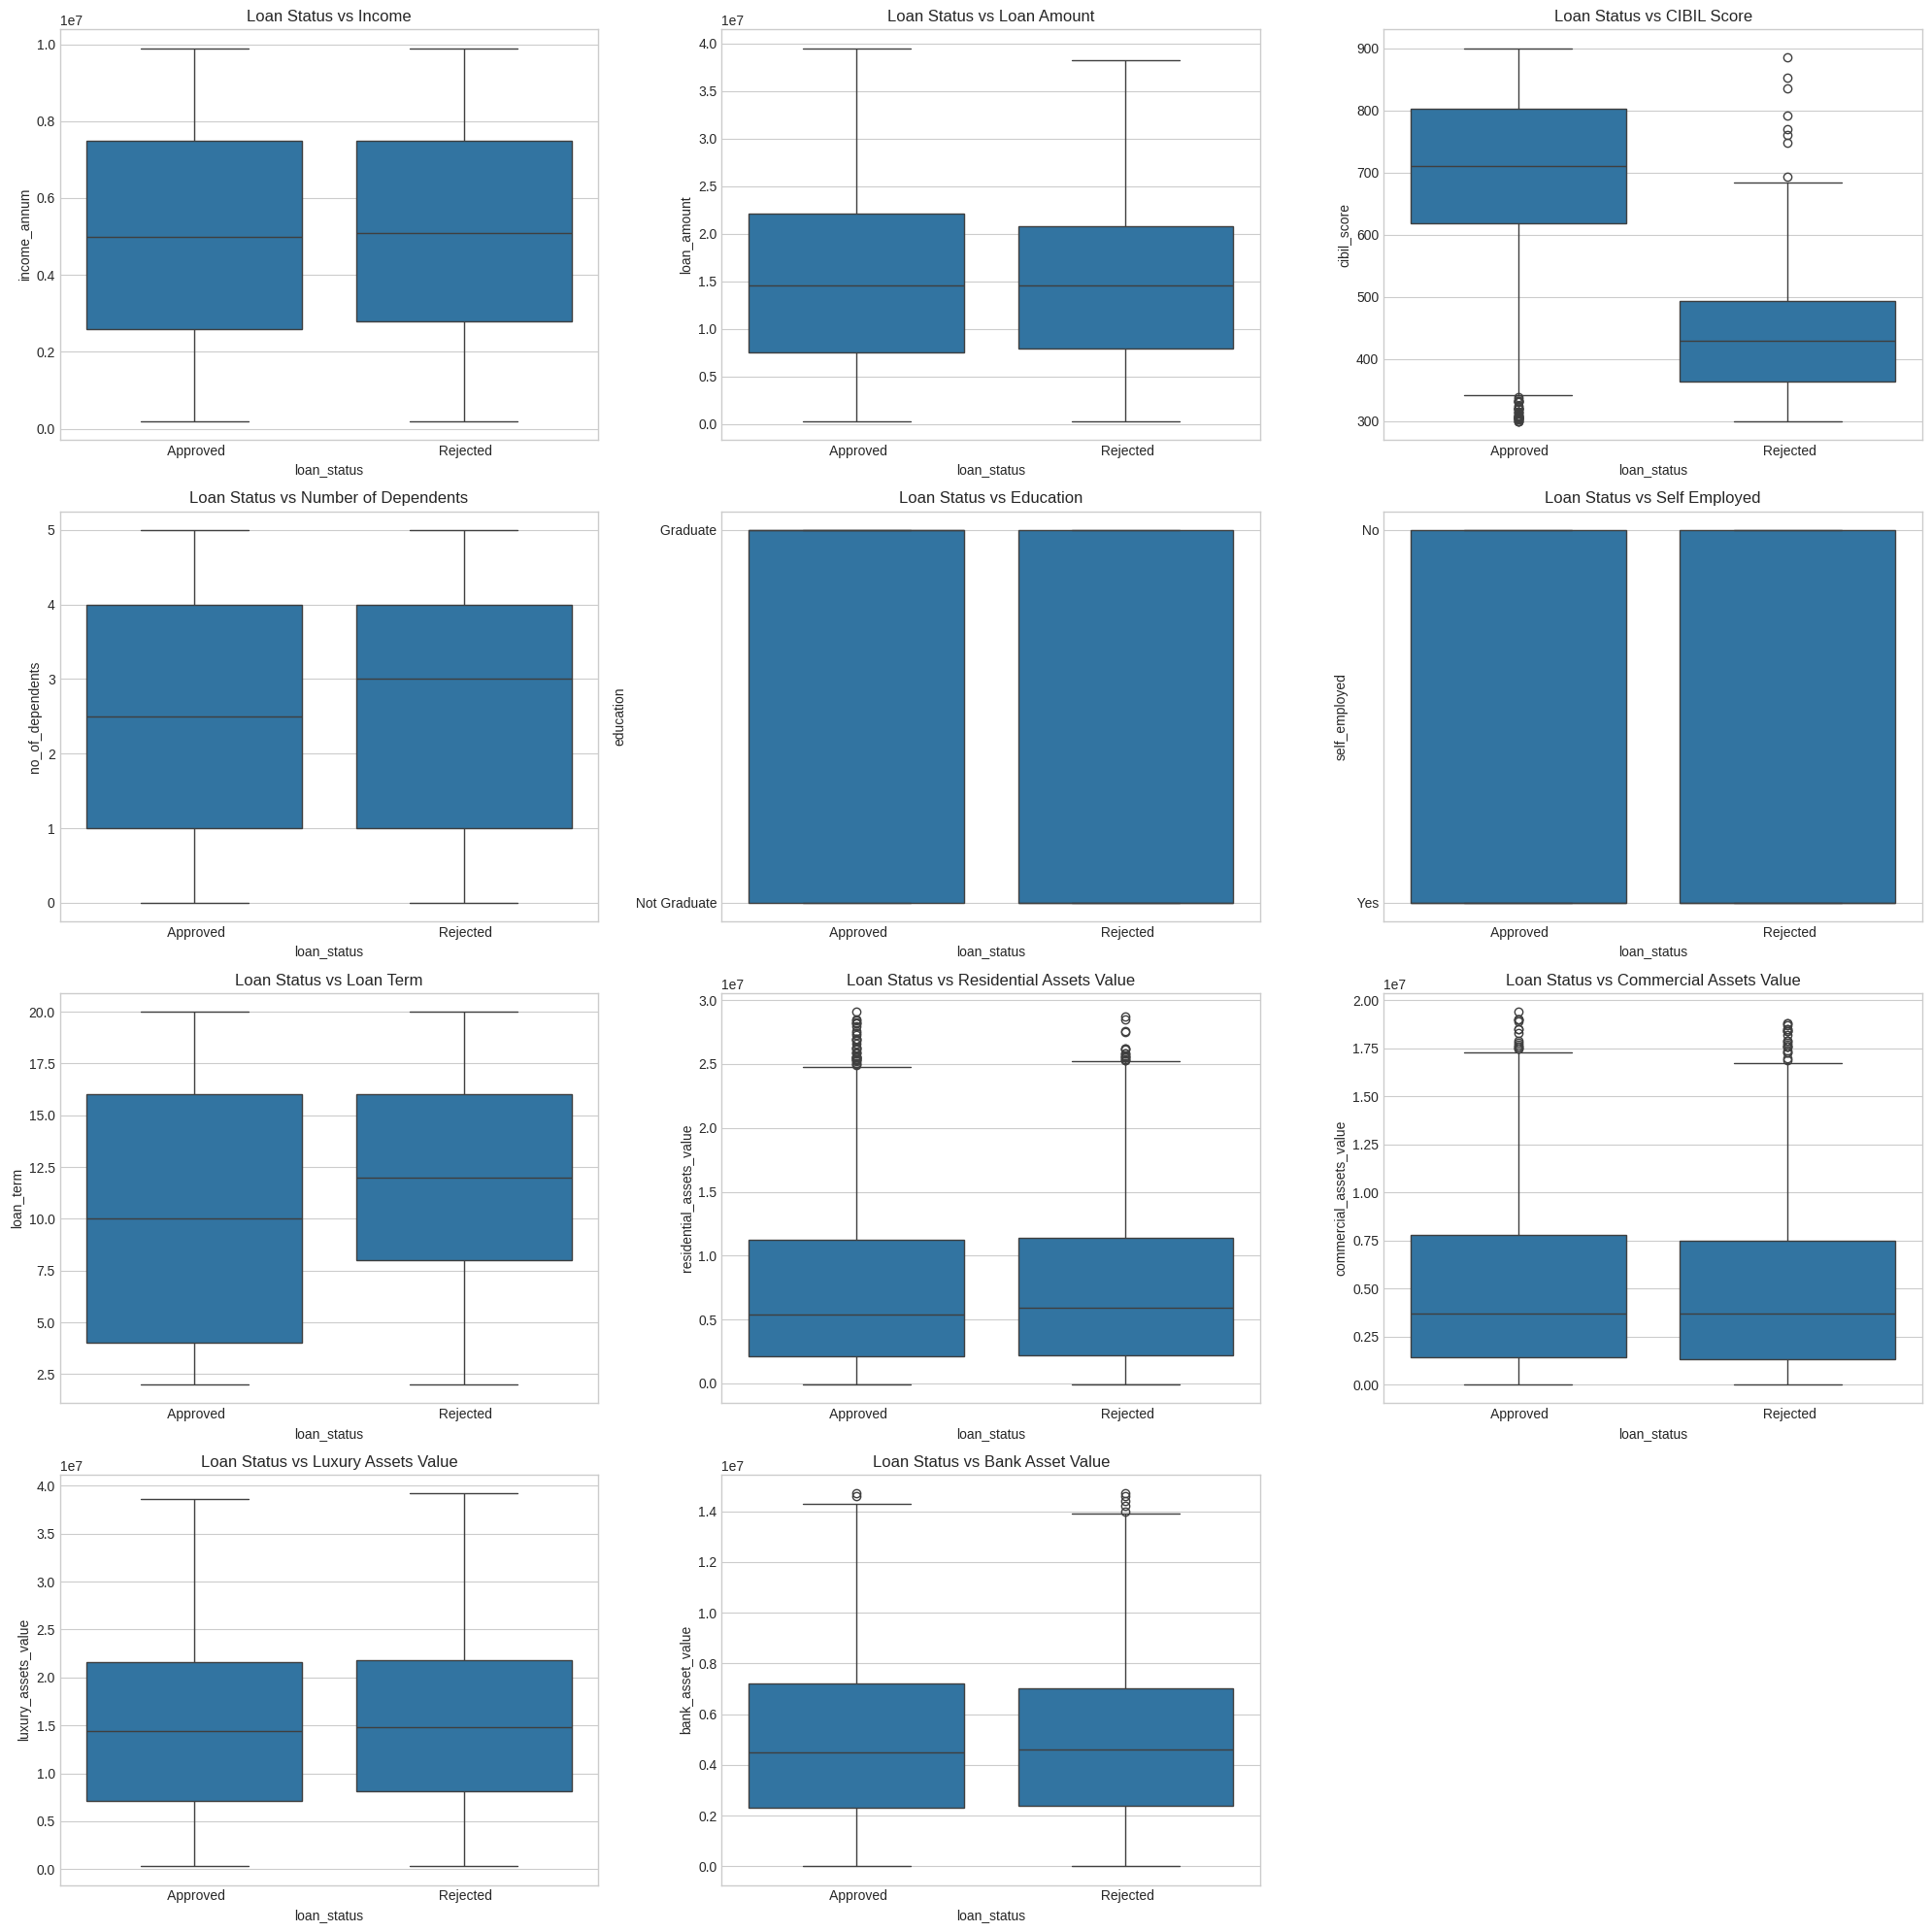

In [41]:
plt.figure(figsize=(20, 20))

# Income vs Loan Status
plt.subplot(4, 3, 1)
sns.boxplot(x='loan_status', y='income_annum', data=orig_df)
plt.title('Loan Status vs Income')

# Loan Amount vs Loan Status
plt.subplot(4, 3, 2)
sns.boxplot(x='loan_status', y='loan_amount', data=orig_df)
plt.title('Loan Status vs Loan Amount')

# CIBIL Score vs Loan Status
plt.subplot(4, 3, 3)
sns.boxplot(x='loan_status', y='cibil_score', data=orig_df)
plt.title('Loan Status vs CIBIL Score')

# Number of Dependents vs Loan Status
plt.subplot(4, 3, 4)
sns.boxplot(x='loan_status', y='no_of_dependents', data=orig_df)
plt.title('Loan Status vs Number of Dependents')

# Education vs Loan Status
plt.subplot(4, 3, 5)
sns.boxplot(x='loan_status', y='education', data=orig_df)
plt.title('Loan Status vs Education')

# Self Employed vs Loan Status
plt.subplot(4, 3, 6)
sns.boxplot(x='loan_status', y='self_employed', data=orig_df)
plt.title('Loan Status vs Self Employed')

# Loan Term vs Loan Status
plt.subplot(4, 3, 7)
sns.boxplot(x='loan_status', y='loan_term', data=orig_df)
plt.title('Loan Status vs Loan Term')

# Residential Assets Value vs Loan Status
plt.subplot(4, 3, 8)
sns.boxplot(x='loan_status', y='residential_assets_value', data=orig_df)
plt.title('Loan Status vs Residential Assets Value')

# Commercial Assets Value vs Loan Status
plt.subplot(4, 3, 9)
sns.boxplot(x='loan_status', y='commercial_assets_value', data=orig_df)
plt.title('Loan Status vs Commercial Assets Value')

# Luxury Assets Value vs Loan Status
plt.subplot(4, 3, 10)
sns.boxplot(x='loan_status', y='luxury_assets_value', data=orig_df)
plt.title('Loan Status vs Luxury Assets Value')

# Bank Asset Value vs Loan Status
plt.subplot(4, 3, 11)
sns.boxplot(x='loan_status', y='bank_asset_value', data=orig_df)
plt.title('Loan Status vs Bank Asset Value')

plt.tight_layout()
plt.show()


In [ ]:
# Can we add all the other features to see how it affected loan status????

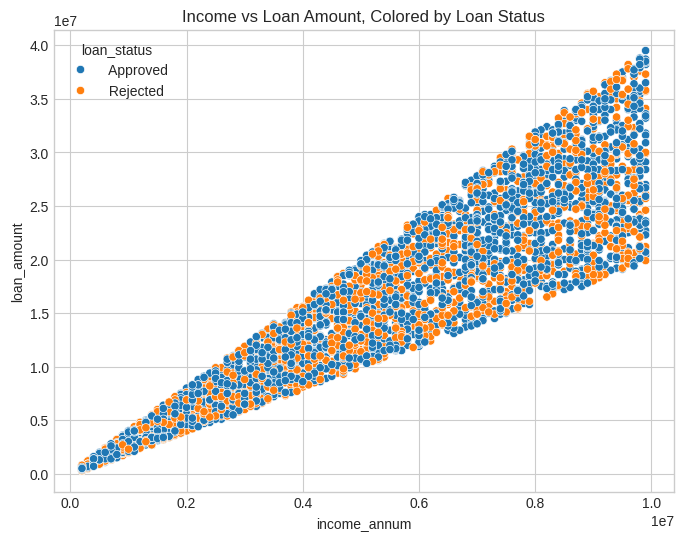

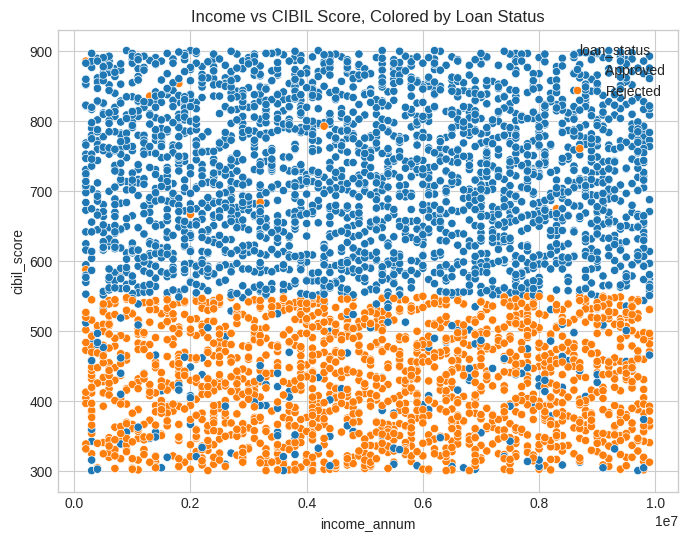

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=orig_df)
plt.title('Income vs Loan Amount, Colored by Loan Status')
plt.show()

# Scatter plot of income_annum vs cibil_score, with loan_status as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_annum', y='cibil_score', hue='loan_status', data=orig_df)
plt.title('Income vs CIBIL Score, Colored by Loan Status')
plt.show()
